# **Exploring Those Who Pay and Those Who Don't**

In this notebook, I will exploring a dataset from Kaggle that contains the loan data of thousands of customres. First, I will clean the data, then I will explore the following questions:


### 1. What is the percentages of Fully Paid and Charged Off, and how much is the current loan amount for each?
### 2. Between the Two Categories, is there a clear difference with Respect to the Given Columns?
### 3. What is the Most Correlated Variable to `Loan Status`?



First let's import the necessary libraries

In [0]:
# Importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot  as plt
import seaborn as sns
sns.set(style="darkgrid")

In [0]:
# Loading the data set
train_data = pd.read_csv('credit_train.csv')

In [3]:
# Looking at the first entries
train_data.head()

,Loan ID,Customer ID,Loan Status,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
0,14dd8831-6af5-400b-83ec-68e61888a048,981165ec-3274-42f5-a3b4-d104041a9ca9,Fully Paid,445412.0,Short Term,709.0,1167493.0,8 years,Home Mortgage,Home Improvements,5214.74,17.2,NaN,6.0,1.0,228190.0,416746.0,1.0,0.0
1,4771cc26-131a-45db-b5aa-537ea4ba5342,2de017a3-2e01-49cb-a581-08169e83be29,Fully Paid,262328.0,Short Term,NaN,NaN,10+ years,Home Mortgage,Debt Consolidation,33295.98,21.1,8.0,35.0,0.0,229976.0,850784.0,0.0,0.0
2,4eed4e6a-aa2f-4c91-8651-ce984ee8fb26,5efb2b2b-bf11-4dfd-a572-3761a2694725,Fully Paid,99999999.0,Short Term,741.0,2231892.0,8 years,Own Home,Debt Consolidation,29200.53,14.9,29.0,18.0,1.0,297996.0,750090.0,0.0,0.0
3,77598f7b-32e7-4e3b-a6e5-06ba0d98fe8a,e777faab-98ae-45af-9a86-7ce5b33b1011,Fully Paid,347666.0,Long Term,721.0,806949.0,3 years,Own Home,Debt Consolidation,8741.90,12.0,NaN,9.0,0.0,256329.0,386958.0,0.0,0.0
4,d4062e70-befa-4995-8643-a0de73938182,81536ad9-5ccf-4eb8-befb-47a4d608658e,Fully Paid,176220.0,Short Term,NaN,NaN,5 years,Rent,Debt Consolidation,20639.70,6.1,NaN,15.0,0.0,253460.0,427174.0,0.0,0.0


### Handling missing data

In [0]:
# Exploring the missing values
def missing_perc (df):
  """ This fucntion takes a data frame and prints out each column and the percentage of the null values
  Input: DataFrame
  Output: Columns  Percitage of missing valus
  """
  print('Column Name\t \t% of missing values')
  return df.isnull().sum()/train_data.shape[0]*100

In [5]:
# Using the function 
missing_perc(train_data)

Column Name	 	% of missing values


Loan ID                          0.511372
Customer ID                      0.511372
Loan Status                      0.511372
Current Loan Amount              0.511372
Term                             0.511372
Credit Score                    19.567423
Annual Income                   19.567423
Years in current job             4.711781
Home Ownership                   0.511372
Purpose                          0.511372
Monthly Debt                     0.511372
Years of Credit History          0.511372
Months since last delinquent    53.380624
Number of Open Accounts          0.511372
Number of Credit Problems        0.511372
Current Credit Balance           0.511372
Maximum Open Credit              0.513361
Bankruptcies                     0.714328
Tax Liens                        0.521320
dtype: float64

We see that  `Months since last delinquent`  has so many missing values, so I will just drop it.

In [0]:
# Droping the column
train_data.drop(labels='Months since last delinquent', inplace=True, axis=1)

In [7]:
# Looking again at the tabel
missing_perc(train_data)

Column Name	 	% of missing values


Loan ID                       0.511372
Customer ID                   0.511372
Loan Status                   0.511372
Current Loan Amount           0.511372
Term                          0.511372
Credit Score                 19.567423
Annual Income                19.567423
Years in current job          4.711781
Home Ownership                0.511372
Purpose                       0.511372
Monthly Debt                  0.511372
Years of Credit History       0.511372
Number of Open Accounts       0.511372
Number of Credit Problems     0.511372
Current Credit Balance        0.511372
Maximum Open Credit           0.513361
Bankruptcies                  0.714328
Tax Liens                     0.521320
dtype: float64

For `Credit Score` and ` Annual Income` I will impute them with the median or mean.

In [0]:
# Replacing the nan by the mean 
train_data.fillna({'Credit Score': train_data['Credit Score'].mean(), 'Annual Income': train_data['Annual Income'].mean()}, inplace=True)

In [9]:
missing_perc(train_data)

Column Name	 	% of missing values


Loan ID                      0.511372
Customer ID                  0.511372
Loan Status                  0.511372
Current Loan Amount          0.511372
Term                         0.511372
Credit Score                 0.000000
Annual Income                0.000000
Years in current job         4.711781
Home Ownership               0.511372
Purpose                      0.511372
Monthly Debt                 0.511372
Years of Credit History      0.511372
Number of Open Accounts      0.511372
Number of Credit Problems    0.511372
Current Credit Balance       0.511372
Maximum Open Credit          0.513361
Bankruptcies                 0.714328
Tax Liens                    0.521320
dtype: float64

For `Years in current job`, I will use the most common one input.

In [10]:
train_data[['Years in current job']].describe()

,Years in current job
count,95778
unique,11
top,10+ years
freq,31121


The top value is 10+ years, so I will use to fill the missing values.

In [0]:
# Replacing the nan with the most common value
train_data.fillna({'Years in current job': '10+ years'}, inplace=True)

In [12]:
missing_perc(train_data)

Column Name	 	% of missing values


Loan ID                      0.511372
Customer ID                  0.511372
Loan Status                  0.511372
Current Loan Amount          0.511372
Term                         0.511372
Credit Score                 0.000000
Annual Income                0.000000
Years in current job         0.000000
Home Ownership               0.511372
Purpose                      0.511372
Monthly Debt                 0.511372
Years of Credit History      0.511372
Number of Open Accounts      0.511372
Number of Credit Problems    0.511372
Current Credit Balance       0.511372
Maximum Open Credit          0.513361
Bankruptcies                 0.714328
Tax Liens                    0.521320
dtype: float64

Now all the remaining columns has less than 1% missing vlaues, so I will just drop them.

In [0]:
# Dropping the remainng rows with nan 
train_data.dropna(inplace=True);

In [14]:
# Checking that it worked
missing_perc(train_data)

Column Name	 	% of missing values


Loan ID                      0.0
Customer ID                  0.0
Loan Status                  0.0
Current Loan Amount          0.0
Term                         0.0
Credit Score                 0.0
Annual Income                0.0
Years in current job         0.0
Home Ownership               0.0
Purpose                      0.0
Monthly Debt                 0.0
Years of Credit History      0.0
Number of Open Accounts      0.0
Number of Credit Problems    0.0
Current Credit Balance       0.0
Maximum Open Credit          0.0
Bankruptcies                 0.0
Tax Liens                    0.0
dtype: float64

### Checking for duplicates

In [15]:
# Using duplicated() and sum() method to get the number of duplicats
train_data[['Loan ID','Customer ID']].duplicated().sum()

17972

There are some duplicates in the ID, this is not normal and they should be droped.

In [0]:
# Dropping the duplicated entries in the IDs columns
train_data.drop_duplicates(subset=['Loan ID','Customer ID'], inplace=True)

In [17]:
# Checking that it worked
train_data[['Loan ID','Customer ID']].duplicated().sum()

0

Finally, I don't need the IDs in the analysis, so I will drop them

In [0]:
# Dropping the IDs columns
train_data.drop(labels=['Loan ID','Customer ID'], axis=1, inplace = True)


In [19]:
# Checking that it worked
train_data.head()

,Loan Status,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
0,Fully Paid,445412.0,Short Term,709.000000,1.167493e+06,8 years,Home Mortgage,Home Improvements,5214.74,17.2,6.0,1.0,228190.0,416746.0,1.0,0.0
1,Fully Paid,262328.0,Short Term,1076.456089,1.378277e+06,10+ years,Home Mortgage,Debt Consolidation,33295.98,21.1,35.0,0.0,229976.0,850784.0,0.0,0.0
2,Fully Paid,99999999.0,Short Term,741.000000,2.231892e+06,8 years,Own Home,Debt Consolidation,29200.53,14.9,18.0,1.0,297996.0,750090.0,0.0,0.0
3,Fully Paid,347666.0,Long Term,721.000000,8.069490e+05,3 years,Own Home,Debt Consolidation,8741.90,12.0,9.0,0.0,256329.0,386958.0,0.0,0.0
4,Fully Paid,176220.0,Short Term,1076.456089,1.378277e+06,5 years,Rent,Debt Consolidation,20639.70,6.1,15.0,0.0,253460.0,427174.0,0.0,0.0


### Handling outliers

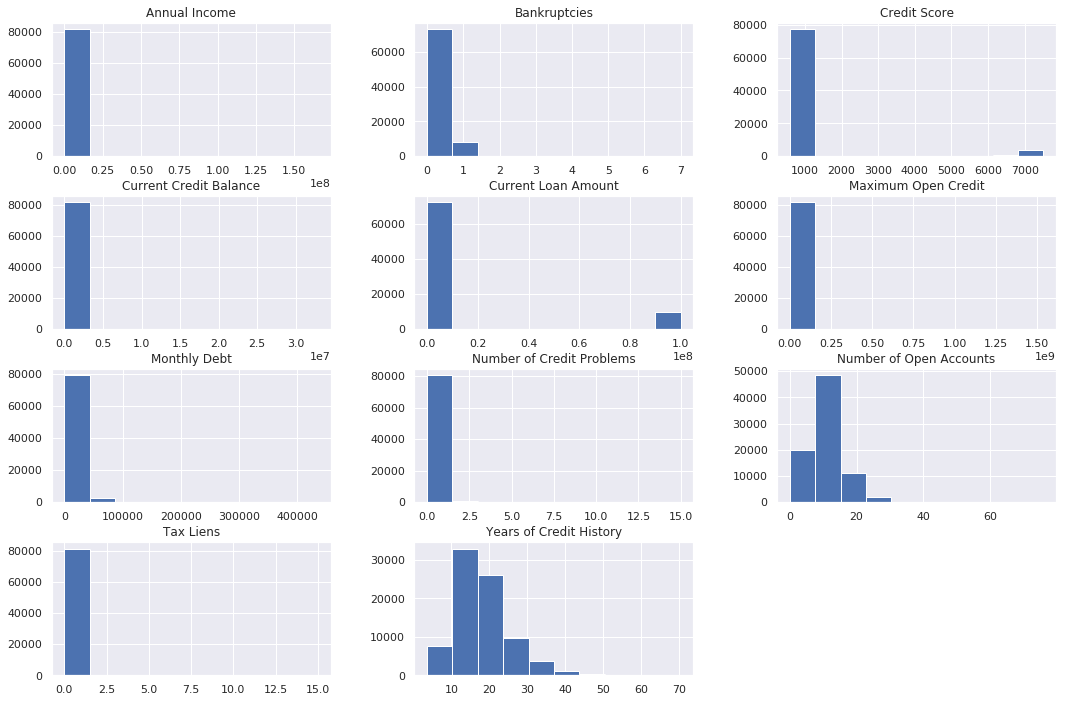

In [20]:
# Using hist() to show the histogram for each neumeric column
train_data.hist(figsize=(18,12));

It seems that there are outliers in `Annual Income, Maximum Open Credit, Current Loan Amount, Current Credit Balance`. I will keep the 99% part only.

In [0]:
# Creating a fucntion that remove the outliers and shows the histograms after the removal 
def rmv_outliers(df, col):
  '''This function takes a data frame and a name of a column, then it returns the dataframe after keeping only 0.99 quantiel
  Input:
    df: Dataframe
    col: Column name, string
  Output: Dataframe without outliers 
  '''
  q = df[col].quantile(0.99)
  df = df[df[col]<q]
  df.hist(figsize=(18,12))
  return df


**I could have written a fucntion that takes a list of column and remove the outliers immediately, however I will do it one by one because I might not need to go through all the columns. It is possible to removing the outliers from the first columm will affect the rest of the column and deletes their outliers as well.**

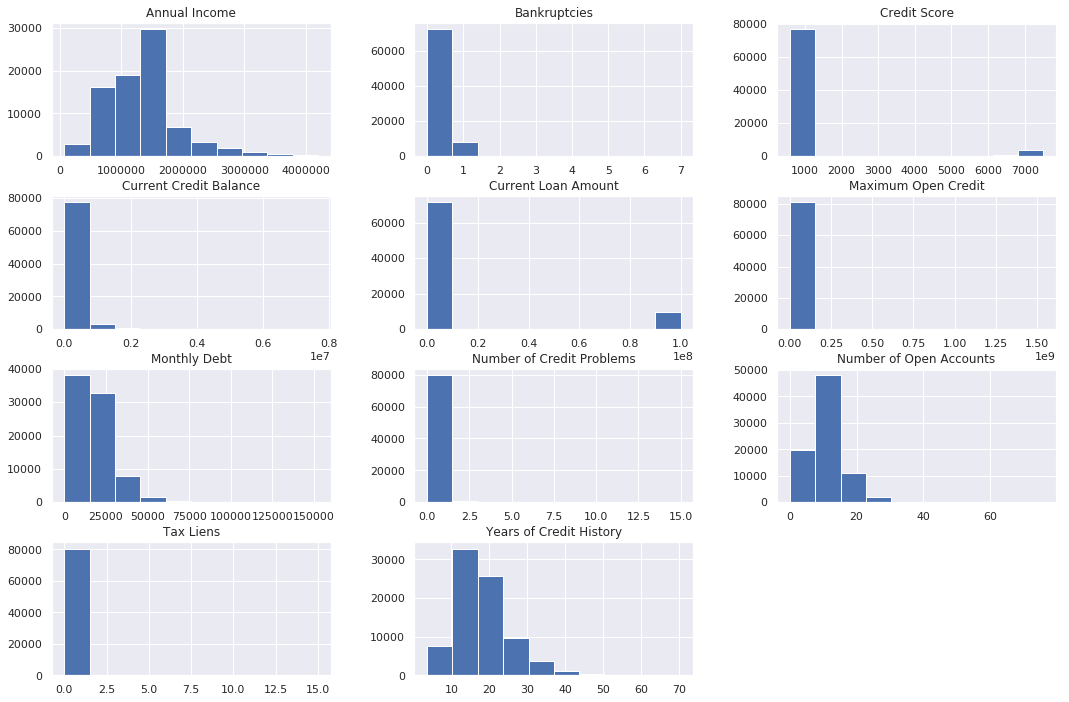

In [22]:
# List of columns with outliers
outliers_col = [ 'Annual Income', 'Maximum Open Credit', 'Current Loan Amount','Current Credit Balance']

train_data = rmv_outliers(train_data, outliers_col[0])

We see that cleaning the `Annual Income` column didn't affect the rest, so we can continue.

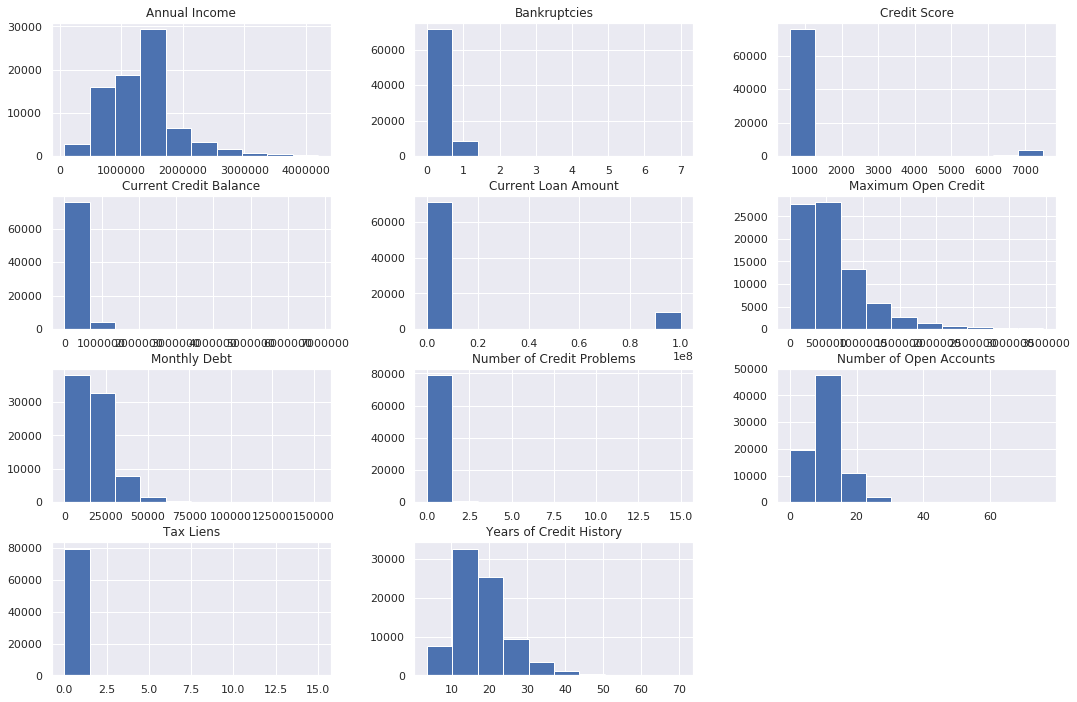

In [23]:
train_data = rmv_outliers(train_data, outliers_col[1])

Cleaning `Maximum Open Credit` has affected `Current Credit Balance` slightly, so we can continue.

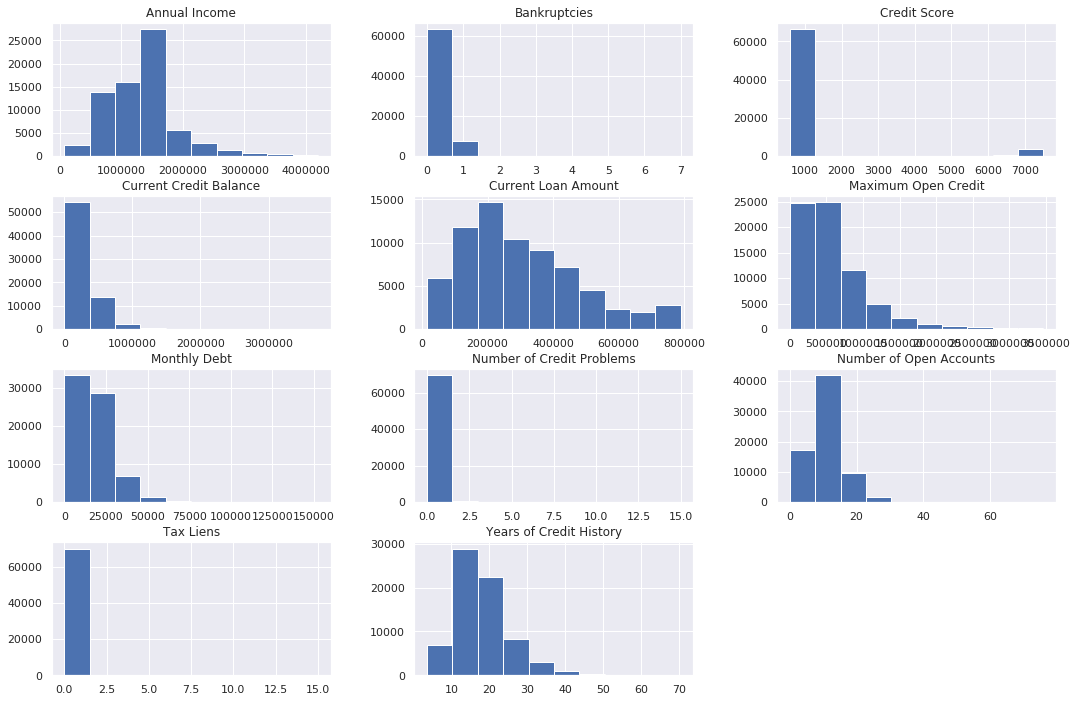

In [24]:
train_data = rmv_outliers(train_data, outliers_col[2])

We see that all now have no outliers, or atleast most of them.

## What is the percentages of Fully Paid and Charged Off, and how much is the current loan amount for each?

The motivation of this question is that will show if the bank is in trouble or not. If most customers are not paying then this is a major issue to be considered. In addition, knowing the exact number is crucial, becuase it is possible that most customers are paying on time, but their loans are just a small portion of those who don't.

In [25]:
# Getting the value counts, then converting the table to a dataframe.
loan_count = pd.DataFrame(train_data['Loan Status'].value_counts()).reset_index()
loan_count

,index,Loan Status
0,Fully Paid,48466
1,Charged Off,22305


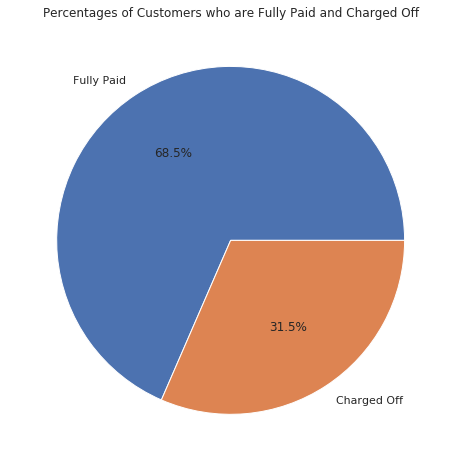

In [26]:
# A piechart to visualize the precentages
plt.figure(figsize=(12,8))
plt.pie(labels=loan_count['index'], x = loan_count['Loan Status'], autopct='%1.1f%%');
plt.title('Percentages of Customers who are Fully Paid and Charged Off');

Almost third of the loan are not paid fully. This seems good, but let's see the amount of money in both categories.

In [27]:
# From the Loan Status and Current Loan Amount columns, get the total loan amount after grouping them according to the status
loan_amnt = train_data[['Loan Status', 'Current Loan Amount']].groupby('Loan Status').sum().reset_index()
loan_amnt

,Loan Status,Current Loan Amount
0,Charged Off,7.196590e+09
1,Fully Paid,1.437730e+10


In [0]:
paid_perc = loan_amnt['Current Loan Amount'][1]/loan_amnt['Current Loan Amount'].sum()*100
not_paid_perc = 100-paid_perc

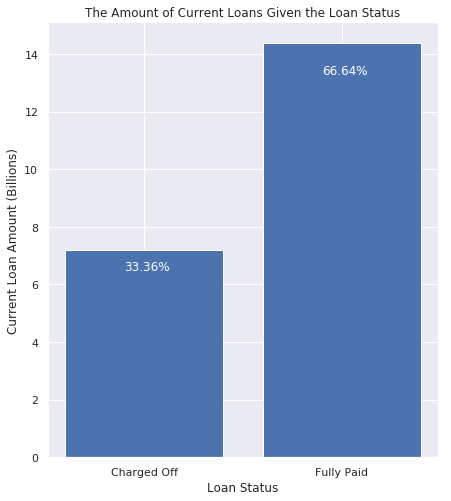

In [29]:
# Ploting a bar chart to visualize the two amounts
plt.figure(figsize = (7,8))
plt.bar(loan_amnt['Loan Status'], height=loan_amnt['Current Loan Amount']/1e9)
plt.ylabel('Current Loan Amount (Billions)')
plt.xlabel('Loan Status');
plt.title('The Amount of Current Loans Given the Loan Status');
plt.text(x=-.1, y = 6.5, s = '{0:0.2f}%'.format(not_paid_perc), color = 'w');
plt.text(x=.9, y = 13.3, s = '{0:0.2f}%'.format(paid_perc), color = 'w');

We see that we have a similar ratio, around 40%. However, having $7B Charged Off is concerning

## Between the Two Categories, is there a clear difference with Respect to the Given Columns?

This quesion tries to find some characteristics that Differentiate the two categories. If indeed there are some differences, then we might be able to predict the commitment of the customer  just by looking at his/her details. 

In [0]:
# Getting two new dataframes, one for each status.
paid = train_data[train_data['Loan Status'] == 'Fully Paid']
not_paid = train_data[train_data['Loan Status'] == "Charged Off"]

In [31]:
paid.head()

,Loan Status,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
0,Fully Paid,445412.0,Short Term,709.000000,1.167493e+06,8 years,Home Mortgage,Home Improvements,5214.74,17.2,6.0,1.0,228190.0,416746.0,1.0,0.0
1,Fully Paid,262328.0,Short Term,1076.456089,1.378277e+06,10+ years,Home Mortgage,Debt Consolidation,33295.98,21.1,35.0,0.0,229976.0,850784.0,0.0,0.0
3,Fully Paid,347666.0,Long Term,721.000000,8.069490e+05,3 years,Own Home,Debt Consolidation,8741.90,12.0,9.0,0.0,256329.0,386958.0,0.0,0.0
4,Fully Paid,176220.0,Short Term,1076.456089,1.378277e+06,5 years,Rent,Debt Consolidation,20639.70,6.1,15.0,0.0,253460.0,427174.0,0.0,0.0
6,Fully Paid,217646.0,Short Term,730.000000,1.184194e+06,< 1 year,Home Mortgage,Debt Consolidation,10855.08,19.6,13.0,1.0,122170.0,272052.0,1.0,0.0


In [32]:
not_paid.head()

,Loan Status,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
5,Charged Off,206602.0,Short Term,7290.000000,8.968570e+05,10+ years,Home Mortgage,Debt Consolidation,16367.74,17.3,6.0,0.0,215308.0,272448.0,0.0,0.0
7,Charged Off,648714.0,Long Term,1076.456089,1.378277e+06,< 1 year,Home Mortgage,Buy House,14806.13,8.2,15.0,0.0,193306.0,864204.0,0.0,0.0
16,Charged Off,653004.0,Long Term,1076.456089,1.378277e+06,7 years,Home Mortgage,Debt Consolidation,14537.09,20.5,9.0,0.0,302309.0,413754.0,0.0,0.0
20,Charged Off,317108.0,Long Term,687.000000,1.133274e+06,8 years,Rent,Debt Consolidation,9632.81,17.4,4.0,0.0,60287.0,126940.0,0.0,0.0
22,Charged Off,153252.0,Short Term,714.000000,1.890690e+06,2 years,Rent,Debt Consolidation,21900.35,15.7,12.0,0.0,891594.0,1081014.0,0.0,0.0


### Exploring the `Term` Column

In [0]:
# Getting columns of interest. I took Current Loan Amount just to use the count function.
loan_term = train_data[['Loan Status', 'Term', 'Current Loan Amount']]

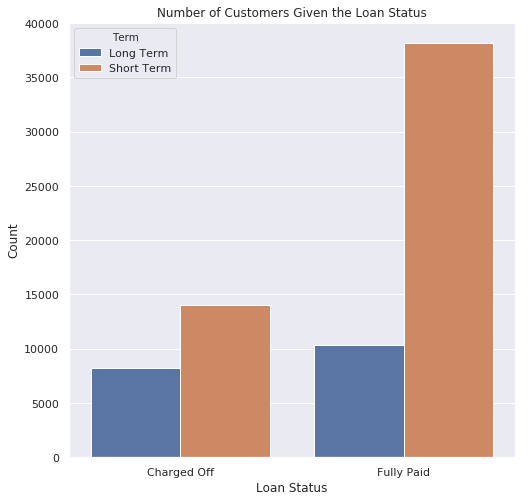

In [34]:
# Grouping and Plotting
plt.figure(figsize = (8,8))
sns.barplot(x = 'Loan Status', y = 'Count', hue = 'Term',
            data = loan_term.groupby(['Loan Status','Term']).agg('count').reset_index().rename(columns = {'Current Loan Amount': 'Count'}));
plt.title('Number of Customers Given the Loan Status');

We notice that in the Fully Paid category, the vast majority are in the Short Term subset, while in the Charged Off, we don't see this clear distction

### Exploring the `Current Loan Amount` Column

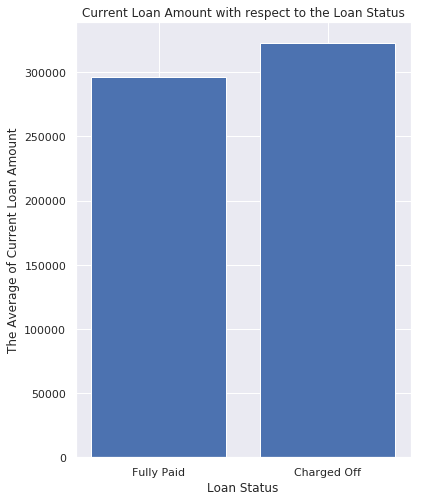

In [35]:
# Plotting the loan average of each category
plt.figure(figsize = (6,8))
plt.bar(x = ['Fully Paid', 'Charged Off'], height = [paid['Current Loan Amount'].mean(),not_paid['Current Loan Amount'].mean() ]);
plt.xlabel('Loan Status')
plt.title('Current Loan Amount with respect to the Loan Status')
plt.ylabel('The Average of Current Loan Amount');

There is a differnece, but not a significant one.

### Exploring the `Annual Income` and `Years of Credit History` Columns

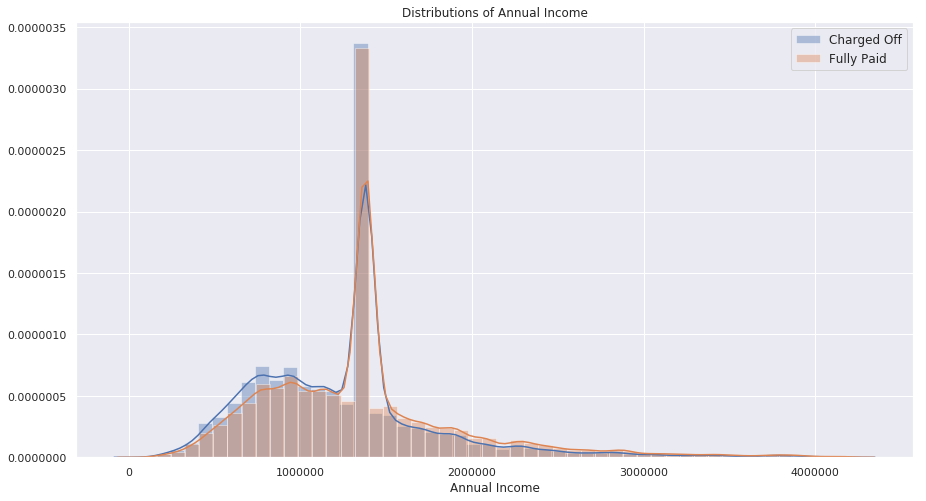

In [36]:
# Plotting histograms of the two categories
plt.figure(figsize = (15,8))
sns.distplot(not_paid['Annual Income'], label= 'Charged Off')
sns.distplot(paid['Annual Income'], label= 'Fully Paid')
plt.legend(fontsize= 'medium');
plt.title('Distributions of Annual Income');

They are virtually  indentical.

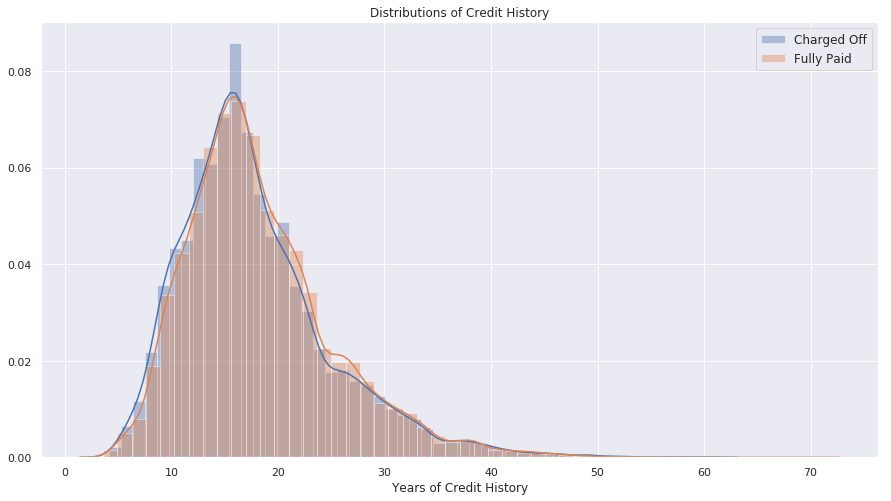

In [37]:
# Plotting histograms of the two categories
plt.figure(figsize = (15,8))
sns.distplot(not_paid['Years of Credit History'], label= 'Charged Off')
sns.distplot(paid['Years of Credit History'], label= 'Fully Paid')
plt.legend(fontsize= 'medium');
plt.title('Distributions of Credit History');

Both are identical

## What is the Most Correlated Variable to `Loan Status`?

This question tries to see if there is a variable that is correlated with the loan status.

In [0]:
# First I need to convert the column to 0 and 1, to apply the corr method correctly
train_data['Category'] = (train_data['Loan Status'] == 'Fully Paid').astype(int)

In [39]:
# Checking that the conversion worked
train_data.head()

,Loan Status,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens,Category
0,Fully Paid,445412.0,Short Term,709.000000,1.167493e+06,8 years,Home Mortgage,Home Improvements,5214.74,17.2,6.0,1.0,228190.0,416746.0,1.0,0.0,1
1,Fully Paid,262328.0,Short Term,1076.456089,1.378277e+06,10+ years,Home Mortgage,Debt Consolidation,33295.98,21.1,35.0,0.0,229976.0,850784.0,0.0,0.0,1
3,Fully Paid,347666.0,Long Term,721.000000,8.069490e+05,3 years,Own Home,Debt Consolidation,8741.90,12.0,9.0,0.0,256329.0,386958.0,0.0,0.0,1
4,Fully Paid,176220.0,Short Term,1076.456089,1.378277e+06,5 years,Rent,Debt Consolidation,20639.70,6.1,15.0,0.0,253460.0,427174.0,0.0,0.0,1
5,Charged Off,206602.0,Short Term,7290.000000,8.968570e+05,10+ years,Home Mortgage,Debt Consolidation,16367.74,17.3,6.0,0.0,215308.0,272448.0,0.0,0.0,0


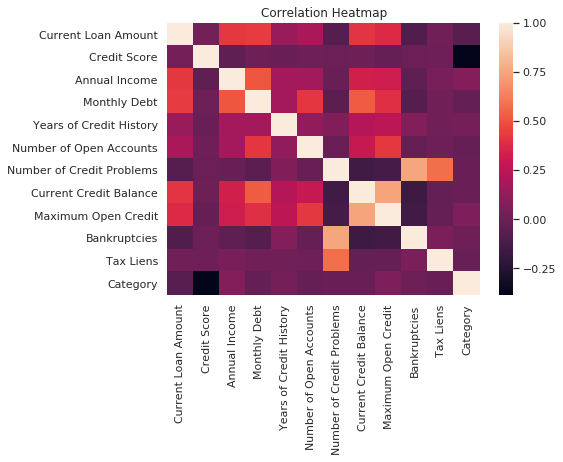

In [40]:
# Using sns heatmap and pandas corr functions to plot the correlation heatmap
plt.figure(figsize=(7,5))
sns.heatmap(train_data.corr())
plt.title('Correlation Heatmap');

In [41]:
# Showing the correlations for the Loan Status only
train_data.corr()['Category'].sort_values()

Credit Score                -0.384421
Current Loan Amount         -0.067047
Monthly Debt                -0.023205
Number of Open Accounts     -0.020708
Tax Liens                   -0.013001
Number of Credit Problems   -0.009300
Current Credit Balance      -0.007047
Bankruptcies                 0.001250
Years of Credit History      0.030389
Maximum Open Credit          0.057589
Annual Income                0.079894
Category                     1.000000
Name: Category, dtype: float64

We see a negative corelation between `Credit Score` and the `Loan Status`, this means that as the credit socre increases the loan status tends to be 'Charged Off'. The value is 0.39 which is not really strong by itself, but comparing it with the other variable, it is high.

# Conclusions
In this notebook, I cleaned the data to analyze it without biases. 
Then, I asked the following questions and answered them:
#### 1. What is the percentages of Fully Paid and Charged Off, and how much is the current loan amount for each?
The results shows that almost third of the customers are behind and the amount of their loan is around $7B, which is about third the total loans.
#### 2. Between the Two Categories, is there a clear difference with Respect to the Given Columns?
While it is expected that those who pay will have a higher income and longer credit history, the data shows no Significant difference. However, the vast majority of those who pay are getting Short Term loans. 
#### 3. What is the Most Correlated Variable to `Loan Status`?
Result shows that the most correlated variable is the Credit Score, which is expected.

All in all, no obvious pattern has been observed in this analysis, and thus a Machine Learning model is needed to extract these small unseen relations. 